## **pyTopoComplexity**
### **Example for using `TPI` from `pytpi.py` to calculate rugosity index** 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GeoLarryLai/pyTopoComplexity/blob/main/Example_pytpi.ipynb)

`TPI` calculates the **Terrain Position Index (TPI)**, a measure of the relative topographic position (i.e., elevation) in relation to the surrounding landforms. This metric is useful for determining surface ruggedness, classifying terrain, assessing local hydrodynamics, and identifying habitat hotspots (Zwoliński & Stefańska, 2015). **TPI**, also known as the *Topographic Position Index* in terrestrial studies (Weiss, 2001), distinguishes landscape features such as hilltops, valleys, flat plains, and upper or lower slopes. In oceanography, researchers adapt the *Bathymetric Position Index (BPI)*, which applies the equivalent `TPI` algorithm to bathymetric data to assess seafloor complexity (Wilson et al., 2007; Walbridge et al., 2018).

The example GeoTIFF rasters include lidar Digital Elevation Model (DEM) files that cover the area affected by a deep-seated landslide that occurred in 2014 in the Oso area of the North Fork Stillaguamish River valley, Washington State, USA (Washington Geological Survey, 2023). These example DEMs vary in grid spacing (i.e., grid size), coordinate reference system (CRS), and unit of grid value (elevation, Z).

Archives of codes and example DEM data:
* Zenodo: https://doi.org/10.5281/zenodo.11239338
* Github repository: https://github.com/GeoLarryLai/pyTopoComplexity
<hr>

### **Theory**

In the `TPI` module, **Terrain Position Index (TPI)** is calculated by comparing the elevation of a grid ($Z_{\text{grid}}$ ) to the mean elevation of its surrounding grids ( $Z_{\text{neighborhood}}$ ) within a specified neighborhood (a square-shaped moving window in this module):

$$
\text{TPI} = Z_{\text{grid}} - \text{mean}(Z_{\text{neighborhood}})
$$

Positive TPI values indicate locations that are higher than the average of their surroundings (e.g., ridges), while negative values indicate locations that are lower (e.g., valleys, saddles). Values near zero indicate flat areas or areas of constant slope. 

<hr>

### **References**
##### Journal Articles: 
* Walbridge, S., Slocum, N., Pobuda, M., Wright, D.J., 2018. Unified Geomorphological Analysis Workflows with Benthic Terrain Modeler. Geosciences 8, 94. https://doi.org/10.3390/geosciences8030094.
* Weiss, A. D. 2001. Topographic Positions and Landforms Analysis (poster), ESRI International User Conference, July 2001. San Diego, CA: ESRI. https://www.jennessent.com/arcview/TPI_Weiss_poster.htm
* Wilson, M.F.J., O’Connell, B., Brown, C., Guinan, J.C., Grehan, A.J., 2007. Multiscale Terrain Analysis of Multibeam Bathymetry Data for Habitat Mapping on the Continental Slope. Marine Geodesy 30, 3-35. https://doi.org/10.1080/01490410701295962.
* Zwoliński, Z., Stefańska, E., 2015. Relevance of moving window size in landform classification by TPI. In: Jasiewicz, J., Zwoliński, Z., Mitasova, H., Hengl, T. (Eds.), Geomorphometry for Geosciences. Bogucki Wydawnictwo Naukowe, pp. 273-277.

##### Digital Elevation Model (DEM) Examples:
* Washington Geological Survey, 2023. 'Stillaguamish 2014' project [lidar data]: originally contracted by Washington State Department of Transportation (WSDOT). [accessed April 4, 2024, at http://lidarportal.dnr.wa.gov]
<hr>

#### **0. Import packages**
##### Check installation of pyTopoComplexity

In [1]:
!pip install pytopocomplexity

##### Import packages
Import the `TPI` class from the `pytpi.py` module.

In [2]:
import os
from pytopocomplexity import TPI

##### Read docstring of TPI

In [3]:
help(TPI)

Help on class TPI in module pytopocomplexity.pytpi:

class TPI(builtins.object)
 |  TPI(window_size)
 |
 |  A class for calculating the Terrain Position Index (TPI) of a land surface using Digital Elevation Model (DEM) data.
 |
 |  The Terrain Position Index (TPI) measures the topographic position of a point relative to the surrounding terrain.
 |  It determines whether a point is situated on a topographic high, low, or a slope. TPI is calculated by comparing
 |  the elevation of a cell to the mean elevation of its surrounding cells within a specified neighborhood.
 |
 |  In terrestrial research, TPI is commonly referred to as the 'Topographic Position Index' (Weiss, 2001).
 |  In oceanography and marine ecology, it is known as the 'Bathymetric Position Index (BPI)' (Wilson et al., 2007).
 |
 |  Required parameters:
 |  -----------
 |  window_size : int
 |      The size of the moving window for TPI calculation. Must be an odd integer >= 3.
 |  input_dir : str
 |      Path and filename 

##### Define the directory of the input example DEM raster

Available LiDAR DEM files:
* **Ososlid2014_f_3ftgrid.tif**
    * CRS: NAD83/Washington South (ftUS) (EPSG: 2286)
    * XY Grid Size: 3.0 [US survey feet]
    * Z Unit: US survey feet
* **Ososlid2014_m_3ftgrid.tif**
    * CRS: NAD83/Washington South (EPSG: 32149)
    * XY Grid Size: ~0.9144 [meters]
    * Z Unit: meters
* **Ososlid2014_f_6ftgrid.tif**
    * CRS: NAD83/Washington South (ftUS) (EPSG: 2286)
    * XY Grid Size: 6.0 [US survey feet]
    * Z Unit: US survey feet
* **Ososlid2014_m_6ftgrid.tif**
    * CRS: NAD83/Washington South (EPSG: 32149)
    * XY Grid Size: ~1.8288 [meters]
    * Z Unit: meters

If the directory doesn't exist, the code will download the example DEM file from the pyTopoComplexity Github repository. 

In [4]:
# Define input file name and directory
base_dir = os.path.join(os.getcwd(), 'ExampleDEM') # input file base directory
input_file = 'Ososlid2014_f_6ftgrid.tif'           # input file name
input_dir = os.path.join(base_dir, input_file)     # input file directory

# Check if base file directory exists. If not, create it
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Define the download URL if the example file does not exist in the base_dir
download_url = "https://github.com/GeoLarryLai/pyTopoComplexity/raw/main/ExampleDEM/" + input_file

# Check if file exists, if not, download it
if not os.path.exists(input_dir):
    try:
        import requests
        response = requests.get(download_url)
        response.raise_for_status()  # Raise an exception for 4XX/5XX responses
        with open(input_dir, 'wb') as f:
            f.write(response.content)
        print(f"Example DEM file {input_file} downloaded to {base_dir}")
    except requests.exceptions.RequestException as e:
        print(f"The file {input_file} does not exist locally or on the GitHub repository.\n{e}")
        raise SystemExit(1)
else:
    print(f"Example DEM file {input_file} already exist in the {base_dir}")

Example DEM file Ososlid2014_f_6ftgrid.tif already exist in the /Users/larryslai/Library/CloudStorage/Dropbox/My Documents/Paper manuscripts/2025-pyTopoComplexity/pyTopoComplexity/ExampleDEM


<hr>

#### **1. Instantiate `TPI` component**
**Parameters:**
* `window_size`: desired value for the edge size (number of grids) of the moving window (N x N). **User must specify a desired value for the window size (in number of grids)** to define the neighborhood for TPI calculation. **'window_size' must be an odd integer >= 3 (minimum 3 x 3 grids window size)**.A larger window size will capture broader-scale topographic features, while a smaller window size will highlight more local variations. 

In [5]:
# Instantiate TPI component
tpi = TPI(
    window_size=17
    )

<hr>

#### **2. Run TPI analysis**
The `analyze` function will compute the TPI result for the given window size.
**Parameters:**
* `input_dir`: file directory to the input DEM raster.
* `chunk_processing` *[optional]*: whether to use chunk-processing optimization, either True (default) or False, to mitigate the RAM outage issues when handling a large raster file.
* `chunksize` *[optional]*: size of each chunk for chunk-processing, default is (512,512). When chunk-processing is on, user can specify the desired chunk size to optimize the performance on your local machine.

**Outputs:**
* `Z`: the array of input elevation data
* `TPI`: the result array of TPI calculation
* `TPIabs`: the result array of absolute TPI values
* `window_m`: the converted window size in meters

In [6]:
# Run analysis using TPI module
_, _, _, window_m = tpi.analyze(
    input_dir, 
    chunk_processing=True, 
    chunksize=(512, 512)
    )
# The function can return 'Z', 'TPI_result', 'TPIabs_result', and 'window_m'

[########################################] | 100% Completed | 106.89 ms


<hr>

#### **3. Export results**
The `export_result` function will save the output as new GeoTIFF rasters in the same folder as your input raster.

**Parameters:**
* `output_tpi_dir`: Specify the directory to save the TPI output GeoTIFF file.
* `output_tpiabs_dir`: Specify the directory to save the absolute TPI output GeoTIFF file.

In [7]:
# Define output file name and file directory
output_tpi_file = os.path.splitext(input_file)[0] + f'_pyTPI({round(window_m, 2)}m).tif'
output_tpiabs_file = os.path.splitext(input_file)[0] + f'_pyTPIabs({round(window_m, 2)}m).tif'
output_tpi_dir = os.path.join(base_dir, output_tpi_file)
output_tpiabs_dir = os.path.join(base_dir, output_tpiabs_file)

# Export result geotiff
tpi.export_result(
    output_tpi_dir, 
    output_tpiabs_dir
    )

'Ososlid2014_f_6ftgrid_pyTPI(31.09m).tif' is saved
'Ososlid2014_f_6ftgrid_pyTPIabs(31.09m).tif' is saved


<hr>

#### **4. Display results**
The `plot_result` function can plot the hillshade map of the original DEM and the TPI result.
**Parameters:**
* `output_dir` *[optional]*: Specify the directory to save the output figure. If it is not specified, the figure will be saved into the same file's directory as your input raster.
* `savefig` *[optional]*: When `savefig = True`, the `plot_result` function will save the output figure in the same folder as your input raster file.
* `figshow` *[optional]*: When `figshow = True`, the `plot_result` function will display the output figure on the screen.
* `showhillshade` *[optional]*: When `showhillshade = True`, the `plot_result` function will display the hillshade plot alongside the TPI data.
* `showtpi` *[optional]*: When `showtpi = True`, the `plot_result` function will display the TPI plot.
* `showabstpi` *[optional]*: When `showabstpi = True`, the `plot_result` function will display the absolute TPI plot.
* `tpicolormax` *[optional]*: For manually define the maximum value for TPI color scale. If not specified, the code will automatically find the most suitable value for the TPI raster file.
* `abstpicolormax` *[optional]*: For manually define the maximum value for absolute TPI color scale. If not specified, the code will automatically find the most suitable value for the absolute TPI raster file.

**Note:** At least one of `showtpi` or `showabstpi` must be True.

Figure saved as 'Ososlid2014_f_6ftgrid_pyTPI(31.09m).png'


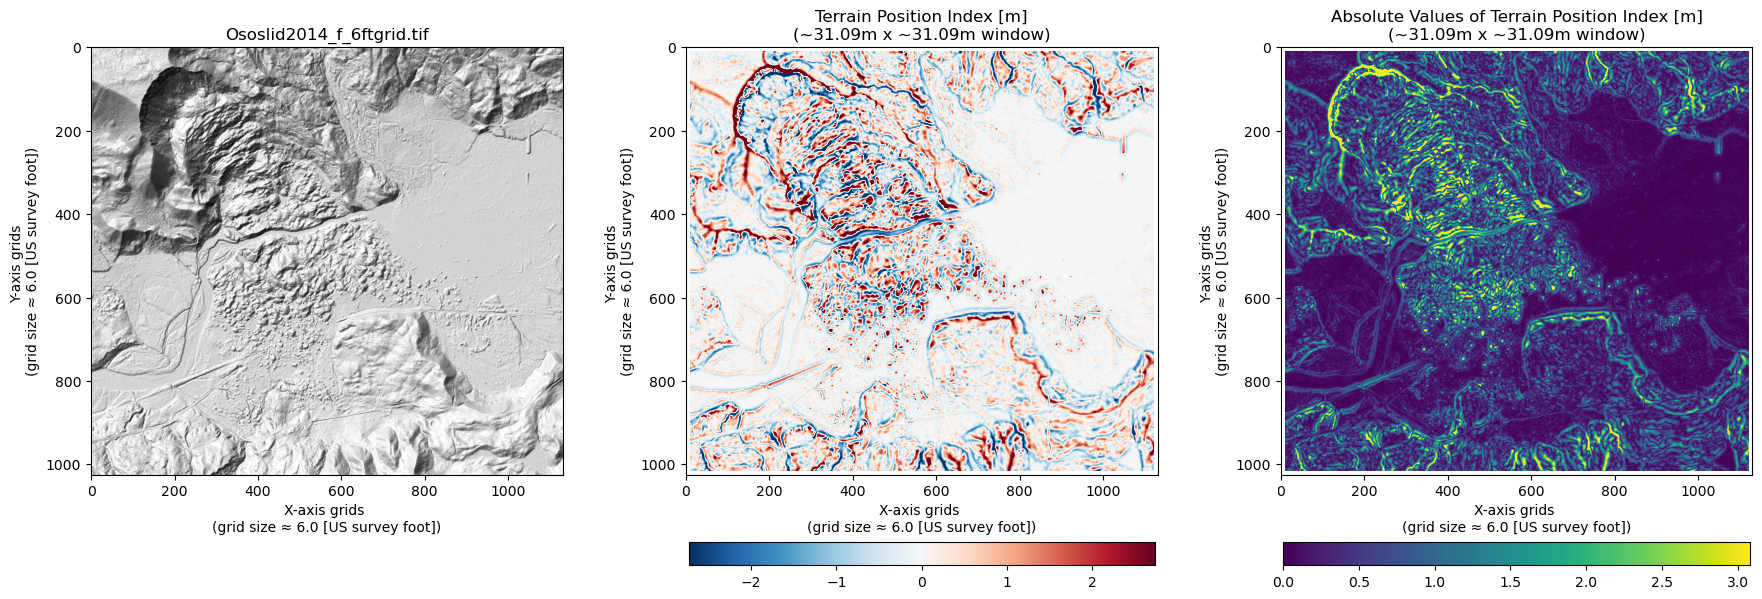

In [8]:
# Plot and save the result figures
tpi.plot_result(
    output_dir=None, 
    savefig=True, 
    figshow=True, 
    showhillshade=True, 
    showtpi=True, 
    showabstpi=True,
    tpicolormax=None,
    abstpicolormax=None
    )